In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
file = "Flightlist_Concat.csv"

flights_df = pd.read_csv(file)
flights_df

,Unnamed: 0,origin,destination,day,callsign
0,0,ZGSZ,KORD,2019-10-01 00:00:00+00:00,CHH705
1,1,LFPG,KORD,2019-10-01 00:00:00+00:00,AFR136
2,2,EDDF,KORD,2019-10-01 00:00:00+00:00,DLH432
3,3,NaN,KORD,2019-10-01 00:00:00+00:00,AZG788
4,4,EGLL,KORD,2019-10-01 00:00:00+00:00,BAW297
...,...,...,...,...,...
462992,462992,KLNK,KORD,2020-12-31 00:00:00+00:00,SKW2678
462993,462993,KCLE,KMDW,2020-12-31 00:00:00+00:00,SWA2023
462994,462994,KDTW,KMDW,2020-12-31 00:00:00+00:00,SWA1515
462995,462995,34MI,KORD,2020-12-31 00:00:00+00:00,SKW5119


In [10]:
flights_df["airline"] = flights_df["callsign"].str[:3]
flights_df

,Unnamed: 0,origin,destination,day,callsign,airline
0,0,ZGSZ,KORD,2019-10-01 00:00:00+00:00,CHH705,CHH
1,1,LFPG,KORD,2019-10-01 00:00:00+00:00,AFR136,AFR
2,2,EDDF,KORD,2019-10-01 00:00:00+00:00,DLH432,DLH
3,3,NaN,KORD,2019-10-01 00:00:00+00:00,AZG788,AZG
4,4,EGLL,KORD,2019-10-01 00:00:00+00:00,BAW297,BAW
...,...,...,...,...,...,...
462992,462992,KLNK,KORD,2020-12-31 00:00:00+00:00,SKW2678,SKW
462993,462993,KCLE,KMDW,2020-12-31 00:00:00+00:00,SWA2023,SWA
462994,462994,KDTW,KMDW,2020-12-31 00:00:00+00:00,SWA1515,SWA
462995,462995,34MI,KORD,2020-12-31 00:00:00+00:00,SKW5119,SKW


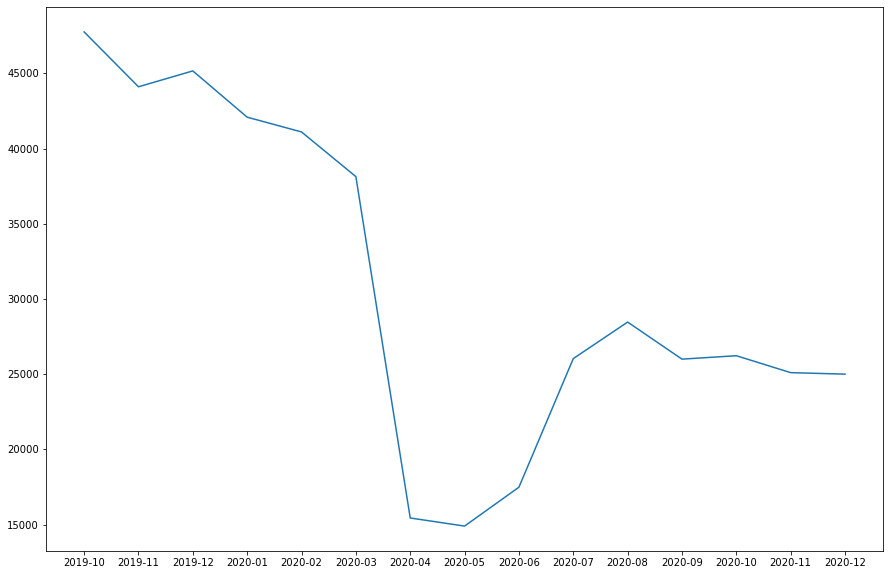

In [29]:
flights_df["month"] = flights_df["day"].str[:7]
flights_by_month = flights_df.groupby("month")
flights_by_month.count()
plt.figure(figsize = (15,10))
plt.plot(flights_by_month["destination"].count())
plt.show()

In [75]:
airlines_grouped = flights_df.groupby(["airline"])
airlines_only = airlines_grouped["destination"]
airlines_df = pd.DataFrame(airlines_only.count())
airlines_df

,destination
airline,
000,89
001,1
003,2
007,1
035,1
...,...
XN3,1
XOJ,323
XSR,58


In [92]:
flights_df["ErrorCheck"] = flights_df["airline"].str.isnumeric()
flights_df.loc[flights_df["ErrorCheck"] == True]

,Unnamed: 0,origin,destination,day,callsign,airline,month,ErrorCheck
1595,1595,KLAX,KORD,2019-10-02 00:00:00+00:00,1037,103,2019-10,True
1685,1685,NaN,KORD,2019-10-01 00:00:00+00:00,00000000,000,2019-10,True
2834,2834,KPHX,KORD,2019-10-02 00:00:00+00:00,523,523,2019-10,True
2905,2905,KADS,KORD,2019-10-02 00:00:00+00:00,525B0473,525,2019-10,True
3752,3752,KAUS,KORD,2019-10-03 00:00:00+00:00,1406,140,2019-10,True
...,...,...,...,...,...,...,...,...
445870,445870,KATL,KORD,2020-12-11 00:00:00+00:00,1374,137,2020-12,True
450942,450942,KEWR,KORD,2020-12-17 00:00:00+00:00,2193,219,2020-12,True
453822,453822,KORF,KMDW,2020-12-20 00:00:00+00:00,943,943,2020-12,True
453931,453931,NaN,KORD,2020-12-21 00:00:00+00:00,1503,150,2020-12,True


In [74]:
airlines_filtered = airlines_df.nlargest(10,"destination")
airlines_filtered

,destination
airline,
SWA,71551
UAL,59211
SKW,56665
AAL,49669
ENY,49102
AWI,26161
RPA,21719
GJS,18079
DAL,11113


<AxesSubplot:xlabel='airline'>

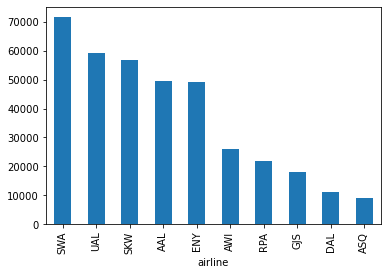

In [79]:
airlines_filtered.plot(kind="bar", legend=False)